In [ ]:
!pip install ultralytics

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO

In [ ]:
model = YOLO("yolov8s.pt")
batch_size = 1
imgsz=640

In [ ]:
# results = model.train(data="/content/drive/MyDrive/green algae/data.yaml", epochs=100, batch=batch_size, imgsz=imgsz)

In [ ]:
model = YOLO("best1.pt")

In [ ]:
a = np.array([1.0, 1.0, 1.0, 1.0]) # 현재 위치
predict_img_path = "algae.jpg" # 예측 하고자 하는 이미지 경로
results = model.predict(predict_img_path)

In [ ]:
# 이미지 예측후 이미지에 예측값 출력
def predict_img_show(img_path):
  image_path = img_path
  img = cv2.imread(image_path)
  results = model.predict(img, max_det=2)
  img = results[0].plot()
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  plt.imshow(img)
  plt.show()

predict_img_show(predict_img_path)

In [ ]:
# 감지한 객체를 이미지에서 추출
def object_extract(img_path, result):
    image = cv2.imread(img_path)

    x_min, y_min, x_max, y_max = result[0].boxes.xyxy.cpu().numpy()[1]
    x_min, y_min, x_max, y_max = map(int, [x_min, y_min, x_max, y_max])

    extracted_region = image[y_min:y_max, x_min:x_max]
    
    print(extracted_region.shape)
    plt.imshow(extracted_region)
    return extracted_region.shape, extracted_region

ext_shape, ext_img = object_extract(predict_img_path, results)

In [ ]:
# 바운딩 박스 사이 거리를 계산
def calculate_closest_edge_distance(bbox1, point):
    def edge_distance(edge1, edge2):
        return abs(edge1 - edge2)

    distances = [
        edge_distance(bbox1[0], point[2]),
        edge_distance(bbox1[2], point[0]),
        edge_distance(bbox1[1], point[3]),
        edge_distance(bbox1[3], point[1])
    ]

    min_distance = min(distances)

    return min_distance

In [ ]:
# 예측 후 거리를 예측
def predict_distance_calculation(model, img_path, x):
    results = model.predict(img_path)
    xyxy = results[0].boxes.xyxy.cpu().numpy()

    bbox_list = []
    min_list = []
    point = x

    for i in range(len(xyxy)):
        bbox_list.append(xyxy[i])
    for i in range(len(xyxy)):
      min_list.append(calculate_closest_edge_distance(bbox_list[i], point))

    calculation = min(min_list)
    print(f"\n result:{calculation}")
    return calculation

result = predict_distance_calculation(model, predict_img_path, a) # 결과 값은 result 변수에 저장

In [ ]:
def predict_img_show(img_path):
  image_path = img_path
  img = cv2.imread(image_path)
  results = model.predict(img)
  img = results[0][1].plot()
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  cv2.circle(img, (150, 100), 8, (0, 0, 255), 3)
  plt.imshow(img)
  plt.show()

predict_img_show(predict_img_path)

In [ ]:
def draw_filled_circles_on_image(image_path, bbox_coordinates, min_radius=8, X = 0, Y = 0):
    a = 100
    b = 0
    image = cv2.imread(image_path)

    width, height = bbox_coordinates[2] - bbox_coordinates[0], bbox_coordinates[3] - bbox_coordinates[1]

    radius = max(width // 2, height // 2, min_radius)
    print(radius)
    
    for i in range(0, 7):
        cv2.circle(image, (X, Y), 30, (0, 0, 255), 3)
        X += 60
        radius -= min_radius


    plt.imshow(image)
    plt.show()
    
predict_img_path = predict_img_path
bbox_coordinates = results[0].boxes.xyxy.cpu().numpy()[1]

draw_filled_circles_on_image(predict_img_path, bbox_coordinates, min_radius=1, X = 150, Y = 100)

In [ ]:
def draw_filled_circles_with_lines(image_path, bbox_coordinates, min_radius=8, X=0, Y=0):
    image = cv2.imread(image_path)

    width, height = bbox_coordinates[2] - bbox_coordinates[0], bbox_coordinates[3] - bbox_coordinates[1]

    radius = max(width // 2, height // 2, min_radius)
    print(radius)

    points = []  # 좌표를 저장할 리스트

    for i in range(0, 7):
        cv2.circle(image, (X, Y), 5, (0, 0, 255), -1)
        points.append((X, Y))  # 현재 

        X += 60
        radius -= min_radius

    # 점들을 선으로 연결
    for i in range(len(points) - 1):
        cv2.line(image, points[i], points[i + 1], (0, 255, 0), 2)

    plt.imshow(image)
    plt.show()

# 예시 이미지 경로와 바운딩 박스 좌표
predict_img_path = predict_img_path  # 이미지 경로를 적절히 수정해주세요.
bbox_coordinates = results[0].boxes.xyxy.cpu().numpy()[1]  # 바운딩 박스 좌표를 적절히 수정해주세요.

# 이미지 위에 점을 찍고 선으로 연결
draw_filled_circles_with_lines(predict_img_path, bbox_coordinates, min_radius=1, X=150, Y=100)


In [ ]:
def draw_filled_circles_with_lines(image, bbox_coordinates, min_radius=8, X=0, Y=0):
    # 이미지 데이터를 전달하도록 수정

    width, height = bbox_coordinates[2] - bbox_coordinates[0], bbox_coordinates[3] - bbox_coordinates[1]
    radius = max(width // 2, height // 2, min_radius)
    
    points = []  # 좌표를 저장할 리스트

    for i in range(0, 7):
        cv2.circle(image, (X, Y), 30, (0, 0, 255), -1)
        points.append((X, Y))
        X += 60
        radius -= min_radius

    # 점들을 선으로 연결
    for i in range(len(points) - 1):
        cv2.line(image, points[i], points[i + 1], (0, 255, 0), 2)

    plt.imshow(image)
    plt.show()

# 예제 이미지 경로와 바운딩 박스 좌표
image = ext_img  # 이미지 데이터 읽기

# 예제로 사용한 bbox_coordinates 값
bbox_coordinates = results[0].boxes.xyxy.cpu().numpy()[1]

# 함수 호출
draw_filled_circles_with_lines(image, bbox_coordinates, min_radius=10, X=60, Y=60)


In [ ]:
# 감지한 객체를 이미지에서 추출
def object_extract(img_path, result):
    image = cv2.imread(img_path)

    x_min, y_min, x_max, y_max = result[0].boxes.xyxy.cpu().numpy()[1]
    x_min, y_min, x_max, y_max = map(int, [x_min, y_min, x_max, y_max])

    extracted_region = image[y_min:y_max, x_min:x_max]
    
    print(extracted_region.shape)
    plt.imshow(extracted_region)
    return extracted_region.shape, extracted_region

ext_shape, ext_img = object_extract(predict_img_path, results)

In [ ]:
ext_shape

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def draw_filled_circles_with_lines(image, min_radius=8, alpha=128):
    # 이미지 크기
    image_size = (image.shape[1], image.shape[0])

    X, Y = min_radius, min_radius  # 초기 좌표
    radius = min_radius

    points = []  # 좌표를 저장할 리스트

    while Y + min_radius <= image_size[1]:
        while X + min_radius <= image_size[0]:
            cv2.circle(image, (X, Y), min_radius, (0, 0, 255, alpha))  # 알파 값을 추가하여 투명도 설정
            points.append((X, Y))
            X += 2 * min_radius  # 가로로 원을 그리고 나서 X 좌표 업데이트

        X = min_radius  # 다음 행으로 넘어갈 때 X 좌표 초기화
        Y += 2 * min_radius  # 세로로 원을 그리고 나서 Y 좌표 업데이트

    # 원을 왼쪽에서 오른쪽으로 이어서 그리기
    for i in range(len(points) - 1):
        cv2.line(image, points[i], points[i + 1], (0, 0, 255, alpha), 2)

    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGRA2RGBA))
    plt.show()

# 함수 호출 (알파 값은 128로 설정)
draw_filled_circles_with_lines(ext_img, min_radius=30, alpha=128)

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def draw_lines_in_rows(image, min_radius=8, alpha=128):
    # 이미지 크기
    image_size = (image.shape[1], image.shape[0])

    X, Y = min_radius, min_radius
    radius = min_radius

    points = []

    while Y + min_radius <= image_size[1]:
        while X + min_radius <= image_size[0]:
            cv2.circle(image, (X, Y), min_radius, (0, 0, 255, alpha))
            points.append((X, Y))
            X += 2 * min_radius

        X = min_radius  # 다음 행으로 넘어갈 때 X 좌표 초기화
        Y += 2 * min_radius  # 세로로 원을 그리고 나서 Y 좌표 업데이트

    for i in range(len(points) - 1):
        center1 = points[i]
        center2 = points[i + 1]
        cv2.line(image, center1, center2, (0, 0, 255, alpha), 2)
    print(points)

    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGRA2RGBA))
    plt.show()

draw_lines_in_rows(ext_img, min_radius=30, alpha=1280)


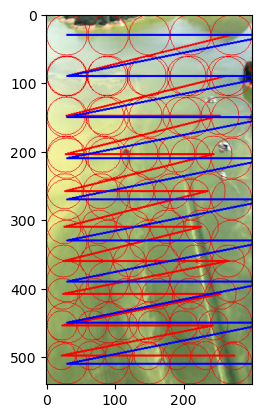

In [168]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def draw_lines_in_rows_with_circles(image, min_radius=8, alpha=128):
    # 이미지 크기
    image_size = (image.shape[1], image.shape[0])

    X, Y = min_radius, min_radius
    radius = min_radius

    points = []

    while Y + min_radius <= image_size[1]:
        while X + min_radius <= image_size[0]:
            cv2.circle(image, (X, Y), min_radius, (0, 0, 255, alpha))
            points.append((X, Y))
            X += 2 * min_radius

        cv2.circle(image, (X, Y), min_radius, (0, 0, 255))
        points.append((X, Y))

        X = min_radius  # 다음 행으로 넘어갈 때 X 좌표 초기화
        Y += 2 * min_radius  # 세로로 원을 그리고 나서 Y 좌표 업데이트

    for i in range(len(points) - 1):
        center1 = points[i]
        center2 = points[i + 1]
        cv2.line(image, center1, center2, (255, 0, 0, alpha), 2)

    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGRA2RGBA))
    plt.show()

# 함수 호출 (알파 값은 128로 설정)
draw_lines_in_rows_with_circles(ext_img, min_radius=30, alpha=255)


(540, 300, 3)


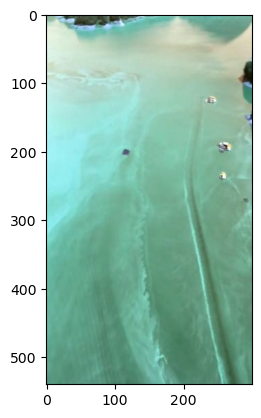

In [169]:
# 감지한 객체를 이미지에서 추출
def object_extract(img_path, result):
    image = cv2.imread(img_path)

    x_min, y_min, x_max, y_max = 200, 100, 500, 640 # result[0].boxes.xyxy.cpu().numpy()[1] 히히 사기치기
    x_min, y_min, x_max, y_max = map(int, [x_min, y_min, x_max, y_max])

    extracted_region = image[y_min:y_max, x_min:x_max]
    
    print(extracted_region.shape)
    plt.imshow(extracted_region)
    return extracted_region.shape, extracted_region

ext_shape, ext_img = object_extract(predict_img_path, results)

In [ ]:
print(results[0].boxes.xyxy.cpu().numpy()[1])
"""200, 100, 500, 640"""


0: 640x640 2 green-algaes, 578.3ms
Speed: 4.8ms preprocess, 578.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


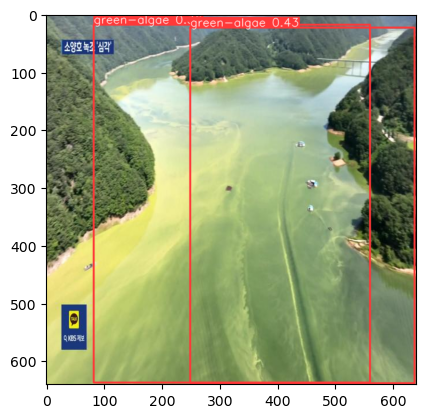

In [147]:
# 이미지 예측후 이미지에 예측값 출력
def predict_img_show(img_path):
  image_path = img_path
  img = cv2.imread(image_path)
  results = model.predict(img, max_det=2)
  img = results[0].plot()
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  plt.imshow(img)
  plt.show()

predict_img_show(predict_img_path)

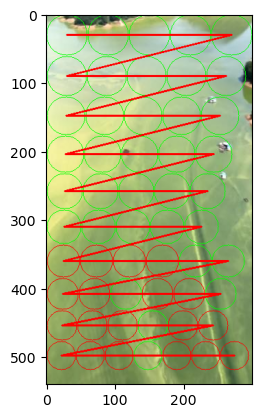

In [170]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def draw_lines_in_rows(image, min_radius=8, alpha=128, threshold=100):
    # 이미지 크기
    image_size = (image.shape[1], image.shape[0])

    X, Y = min_radius, min_radius
    radius = min_radius

    points = []

    while Y + min_radius <= image_size[1]:
        while X + min_radius <= image_size[0]:
            # 원을 그리기 전에 B 값이 threshold를 초과하는지 확인
            if image[Y, X, 0] > threshold:
                cv2.circle(image, (X, Y), min_radius, (0, 255, 0, alpha))  # 초록색으로 그리기
            else:
                cv2.circle(image, (X, Y), min_radius, (0, 0, 255, alpha))  # 빨간색으로 그리기

            points.append((X, Y))
            X += 2 * min_radius

        X = min_radius  # 다음 행으로 넘어갈 때 X 좌표 초기화
        Y += 2 * min_radius  # 세로로 원을 그리고 나서 Y 좌표 업데이트
        min_radius -= 1

    for i in range(len(points) - 1):
        center1 = points[i]
        center2 = points[i + 1]
        cv2.line(image, center1, center2, (0, 0, 255, alpha), 2)

    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGRA2RGBA))
    plt.show()

draw_lines_in_rows(ext_img, min_radius=30, alpha=1280, threshold=100)

[(35, 35), (105, 35), (175, 35), (245, 35), (35, 105), (101, 105), (167, 105), (233, 105), (33, 171), (95, 171), (157, 171), (219, 171), (31, 233), (89, 233), (147, 233), (205, 233), (263, 233), (29, 291), (83, 291), (137, 291), (191, 291), (245, 291), (27, 345), (77, 345), (127, 345), (177, 345), (227, 345), (25, 395), (71, 395), (117, 395), (163, 395), (209, 395), (255, 395), (23, 441), (65, 441), (107, 441), (149, 441), (191, 441), (233, 441), (275, 441), (21, 483), (59, 483), (97, 483), (135, 483), (173, 483), (211, 483), (249, 483), (19, 521), (53, 521), (87, 521), (121, 521), (155, 521), (189, 521), (223, 521), (257, 521)]


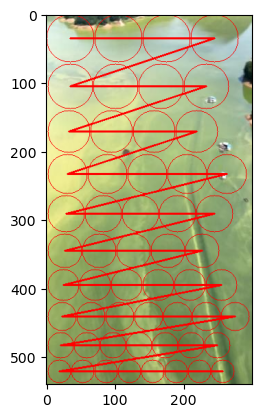

In [165]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def draw_lines_in_rows(image, min_radius=8, alpha=128):
    # 이미지 크기
    image_size = (image.shape[1], image.shape[0])

    X, Y = min_radius, min_radius
    radius = min_radius

    points = []

    while Y + min_radius <= image_size[1]:
        while X + min_radius <= image_size[0]:
            cv2.circle(image, (X, Y), min_radius, (0, 0, 255, alpha))
            points.append((X, Y))
            X += 2 * min_radius

        X = min_radius  # 다음 행으로 넘어갈 때 X 좌표 초기화
        Y += 2 * min_radius  # 세로로 원을 그리고 나서 Y 좌표 업데이트
        min_radius -= 2

    for i in range(len(points) - 1):
        center1 = points[i]
        center2 = points[i + 1]
        cv2.line(image, center1, center2, (0, 0, 255, alpha), 2)
    print(points)

    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGRA2RGBA))
    plt.show()

draw_lines_in_rows(ext_img, min_radius=35, alpha=1280)